## $R_{0}$ Becslése

Két gyakran használt statisztikai becslési módszert fogunk megvizsgálni:  
(1) Exponenciális növekedési ütem alkalmazása $R_{0}$ becslésére (_exponential growth rate_)  
(2) Tényleges 'szaporodási' számmal való közelítés  



**(1) Módszer alkalmazása**  
Két statisztikai lépésben végezhető el ez a becslés: megbecsüljük az exponenciális növekedési ütemet, amit _r_ jelöl, majd _r_ segítségével kiszámítjuk $R_{0}$ értéket.

In [2]:
import sympy as sp

t=sp.Symbol('t')
j=sp.Function('j')
tau=sp.symbols(u'τ') #megfertőződés óta eltelt idő
A=sp.Function('A')


val=sp.integrate(A(tau)*j(t-tau), (tau, 0, sp.oo))

expr1=sp.Equality(j(t), val)
expr1

Eq(j(t), Integral(A(τ)*j(t - τ), (τ, 0, oo)))

Ha feltesszük, hogy a járvány kezdetekor $j(t)$ exponenciálisan növekedő _r_ sebességgel (ami az exponenciális növekedési ütem),  
akkor ebben az esetben könnyen megkapható $A(\tau)$

In [3]:
k=sp.Symbol('k')
r=sp.Symbol('r')
expr2=sp.Equality(j(t), k*sp.E**(r*t))
expr3=sp.Equality(j(t-tau), k*sp.E**(r*t)*sp.E**(-r*tau))

display(expr2,expr3)

Eq(j(t), k*exp(r*t))

Eq(j(t - τ), k*exp(r*t)*exp(-r*τ))

Egy egyszerű behelyettesítéssel megkaphatjuk:

In [4]:
expr4=sp.Equality(k*sp.E**(r*t), sp.integrate(A(tau)*k*sp.E**(r*t)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr4)

Eq(k*exp(r*t), k*exp(r*t)*Integral(A(τ)*exp(-r*τ), (τ, 0, oo)))

Mivel a sympy rendkívűl okos, ki is hozta az integrálból azokat a tagokat, amik nem függnek $\tau$-tól. Egy egyszerű átosztással pedig a következő egyenlőséget kapjuk:

In [5]:
expr5=sp.Equality(1, sp.integrate(A(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr5)

Eq(1, Integral(A(τ)*exp(-r*τ), (τ, 0, oo)))

Mostmár közel vagyunk ahhoz, hogy meghatározzuk $A(\tau)$-t és onnan már egy egyszerű lépés, hogy kapjunk egy értéket $R_{0}$-ra is. Ehhez vesszük $g(\tau)$ függvényt, ami 'generálódási' idő sűrűségfüggvénye, azaz azt mondja meg, hogy $\tau$ idő alatt mennyire gyakori a másodlagos megbetegedések száma.

In [6]:
g=sp.Function('g')
s=sp.Symbol('s')
expr6=sp.Equality(g(tau), A(tau)/sp.integrate(A(s), (s, 0, sp.oo)))
display(expr6)

Eq(g(τ), A(τ)/Integral(A(s), (s, 0, oo)))

Itt a nevező jelentése: az összes elsődlegesen megfertőzödött egyén által megfertőzött másodlagos fertőzések száma, ami a definícionk alapján pont $R_{0}$. Vagyis azt kapjuk, hogy:

In [7]:
R_0=sp.Symbol('R_0')
expr7=sp.Equality(g(tau), A(tau)/R_0)
expr8=sp.Equality(A(tau), R_0*g(tau))
display(expr7, expr8)

Eq(g(τ), A(τ)/R_0)

Eq(A(τ), R_0*g(τ))

Ezt visszahelyettesítve az (5)-ös egyenletünkbe megkapjuk:

In [8]:
expr9=sp.Equality(1, sp.integrate(R_0*g(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
expr10=sp.Equality(R_0, 1/sp.integrate(g(tau)*sp.E**(-r*tau), (tau, 0, sp.oo)))
display(expr9, expr10)

Eq(1, R_0*Integral(g(τ)*exp(-r*τ), (τ, 0, oo)))

Eq(R_0, 1/Integral(g(τ)*exp(-r*τ), (τ, 0, oo)))

Ezzel megkapunk egy becslést $R_{0}$-ra, amihez két adatra van szükségünk:  
(1) a már említett _r_ exponenciális növekedési ütem  
(2) valamint a $g(\tau)$, ami a másodlagos megfertőződések száma $\tau$ idő alatt  
  
Persze számos másfajta becslése is létezik $R_{0}$-nak, pl. az Actual Reproduction Number segítségével vett közelítés, ML-becslés, SIR modellből származtatott $R_{0}$ és még sok más.
A korábbiakban levezetett 'képlet' $R_{0}$-ra talán a leggyakrabban használt számítási módszer, de kell hozzá _r_.

### r meghatározása
**'Pure Birth Process' (Folytonos Markov Láncok spec. esete)**  
Ha ismert a 0-adik időpillanattól a $t-1$-edik időpillanatig az új fertőzések száma (azaz, amit $j(t)$-vel jelöltünk korábban), akkor a $t$-edik időpillanatban az esetek számának ($J_{t}$) felételes valószínűsége a következő kifejezéssel arányos:

In [9]:
J_i=sp.Symbol('J_i')
J_t=sp.Symbol('J_t')
J_0=sp.Symbol('J_0')
i=sp.Symbol('i')
expr11=sp.E**(-r*sp.Sum(J_i, (i, 0, t-1)))*(1-sp.E**(-r))**(J_t-J_0)
display(expr11)

(1 - exp(-r))**(-J_0 + J_t)*exp(-r*Sum(J_i, (i, 0, t - 1)))

Ebből meghatározható _r_ Maximum-Likelihood becsléssel (és adható 95%-os konfidenciaintervallum)

## $R_{0}$ vizsgálata és ábrázolása számított adatokból

Az alábbiakban 8 országban a megfigyelt fertőzött egyének számát és az exponenciális növekedési ütemmel becsült $R_{0}$ (basic reproduction number) viszonyát vetjük össze. Először beolvassuk az adatokat.

In [10]:
import pandas as pd
import seaborn as sns
import warnings

R_0_vals = pd.read_csv('R0_vals.csv')
USA_cases = pd.read_csv('USA.csv')
India_cases = pd.read_csv('India.csv')
Brazil_cases = pd.read_csv('Brazil.csv')
Russia_cases = pd.read_csv('Russia.csv')
Peru_cases = pd.read_csv('Peru.csv')
Colombia_cases = pd.read_csv('Colombia.csv')
Turkey_cases = pd.read_csv('Turkey.csv')
Germany_cases = pd.read_csv('Germany.csv')

In [11]:
cases=[USA_cases,India_cases,Brazil_cases,Russia_cases,Peru_cases,Colombia_cases,Turkey_cases,Germany_cases]

Ezután mivel az $R_{0}$-at tartalmazó táblázatban a dátumok nem azonos formátumúak a további adatokat tartalmazó táblázatokkal, így ezeket átírjuk, hogy a többi dátummal a későbbiekben összehasonlítható legyen.

In [12]:
pd.options.mode.chained_assignment = None 
R_0_vals = pd.read_csv('R0_vals.csv')
for i in range(len(R_0_vals)):
    if len(R_0_vals['Date'][i])==8:
        R_0_vals['Date'][i]=(R_0_vals['Date'][i])[1:5]
        
for i in range(len(R_0_vals)):
    if (R_0_vals['Date'][i])[2]=='0':
        R_0_vals['Date'][i]=(R_0_vals['Date'][i])[0:2]+(R_0_vals['Date'][i])[3]
display(R_0_vals)

,Date,USA,India,Brazil,Russia,Peru,Colombia,Turkey,Germany
0,2/8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/12,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,9/7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
213,9/8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
214,9/9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
215,9/10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [13]:
for i in range(len(R_0_vals)):
    R_0_vals['Date'][i]='2020/'+(R_0_vals['Date'][i])[0:5]
display(R_0_vals)

,Date,USA,India,Brazil,Russia,Peru,Colombia,Turkey,Germany
0,2020/2/8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020/2/9,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020/2/10,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020/2/11,0.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/2/12,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
212,2020/9/7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
213,2020/9/8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
214,2020/9/9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
215,2020/9/10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


A többi táblázatban találhatóak olyan adatokat tartalmazó oszlopok, amik az $R_{0}$ számításhoz hasznosak voltak, de számunkra nem relevánsak, így eltároljuk csak a fertőzött egyének számát minden országból.

In [14]:
Table=pd.DataFrame(columns=['Date', 'USA infected', 'India infected', 'Brazil infected', 'Russia infected', 
                            'Peru infected', 'Colombia infected', 'Turkey infected', 'Germany infected'])
Table['Date']=R_0_vals['Date']
infected_list=['USA infected', 'India infected', 'Brazil infected', 'Russia infected', 'Peru infected', 'Colombia infected', 'Turkey infected', 'Germany infected']
for j in range(len(infected_list)):
    for i in range(len(Table)):
        if len(cases[j].loc[cases[j]['Date']==Table['Date'][i], 'Infected individuals'].values)>0:
            Table[infected_list[j]][i]=cases[j].loc[cases[j]['Date']==Table['Date'][i], 'Infected individuals'].values[0]
        else:
            continue
Table

,Date,USA infected,India infected,Brazil infected,Russia infected,Peru infected,Colombia infected,Turkey infected,Germany infected
0,2020/2/8,11,3,NaN,2,NaN,NaN,NaN,13
1,2020/2/9,11,3,NaN,2,NaN,NaN,NaN,14
2,2020/2/10,11,3,NaN,2,NaN,NaN,NaN,14
3,2020/2/11,12,3,NaN,2,NaN,NaN,NaN,16
4,2020/2/12,12,3,NaN,2,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...
212,2020/9/7,6300622,4280422,4147794,1027334,689977,671848,281509,253626
213,2020/9/8,6327009,4370128,4162073,1032354,691575,671533,283270,254957
214,2020/9/9,6360212,4465863,4197889,1037526,696190,686851,284943,256433
215,2020/9/10,6396100,4562414,4238446,1042836,702776,694664,286455,258149


Az adattisztogatás végével itt jön az érdekesebb rész. Tekintjük, hogy a becsült $R_{0}$ segítségével várhatóan mennyi lehet a rákövetkező napon a fertőzöttek száma, majd ezt összevetjük a megfigyelt esetszámmal.

In [15]:
approximated=[0]
for i in range(1,len(R_0_vals)):
    approximated.append(R_0_vals['USA'][i]*Table['USA infected'][i])
approximated 
approximated_data={
    'approximated' : approximated,
    'date' : R_0_vals['Date']
}
approximated_data=pd.DataFrame(approximated_data)
approximated_data

approximated_data.reset_index(inplace=True)
approximated_data.set_index('date', inplace=True)

In [16]:
Table.reset_index(inplace=True)
Table.set_index('Date', inplace=True)

In [17]:
Table1 = Table.iloc[[ i for i in range(0,25)]]
Table2 = approximated_data.iloc[[ i for i in range(0,25)]]

Table3 = Table.iloc[[ i for i in range(25,50)]]
Table4 = approximated_data.iloc[[ i for i in range(25,50)]]

Table5 = Table.iloc[[ i for i in range(50,75)]]
Table6 = approximated_data.iloc[[ i for i in range(50,75)]]

Table7 = Table.iloc[[ i for i in range(75,100)]]
Table8 = approximated_data.iloc[[ i for i in range(75,100)]]

Table9 = Table.iloc[[ i for i in range(100,125)]]
Table10 = approximated_data.iloc[[ i for i in range(100,125)]]

Table11 = Table.iloc[[ i for i in range(190,216)]]
Table12 = approximated_data.iloc[[ i for i in range(190,216)]]

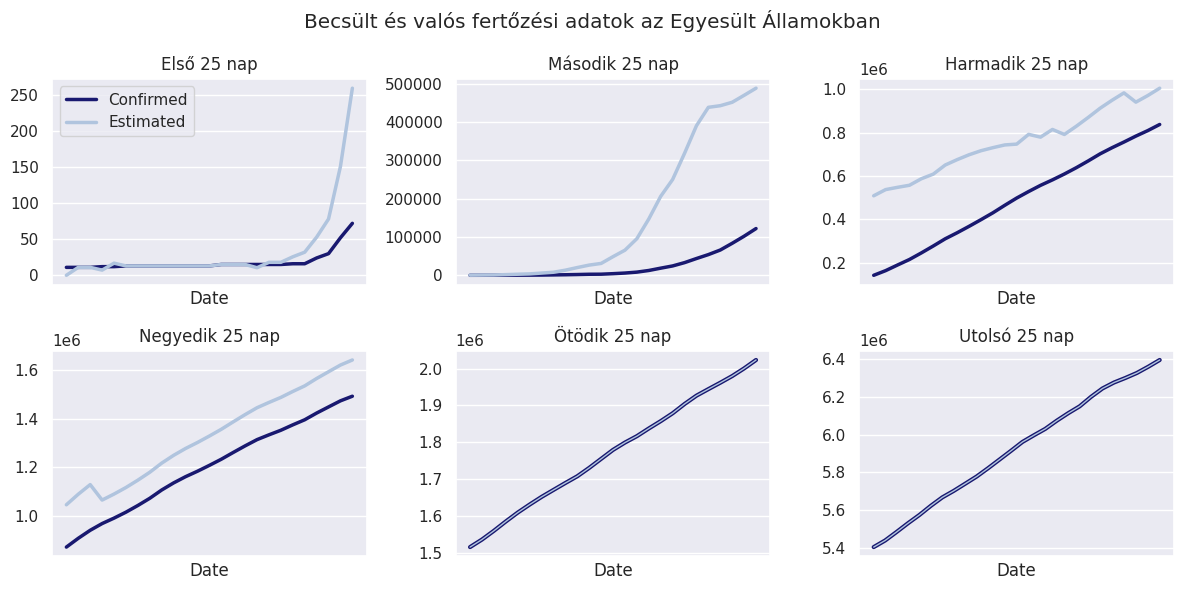

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,3, figsize=(12,6))

sns.set_theme(style="darkgrid")

g1=sns.lineplot(data=Table1['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[0,0], label='Confirmed')
sns.lineplot(data=Table2['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[0,0], label='Estimated')
g1.set(xticks=[])
g1.set_ylabel(None)
axs[0,0].set_title('Első 25 nap')

g2=sns.lineplot(data=Table3['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[0,1])
sns.lineplot(data=Table4['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[0,1])
g2.set(xticks=[])
g2.set_ylabel(None)
axs[0,1].set_title('Második 25 nap')

g3=sns.lineplot(data=Table5['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[0,2])
sns.lineplot(data=Table6['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[0,2])
g3.set(xticks=[])
g3.set_ylabel(None)
axs[0,2].set_title('Harmadik 25 nap')

g4=sns.lineplot(data=Table7['USA infected'], linewidth=2.5, color='midnightblue', ax=axs[1,0])
sns.lineplot(data=Table8['approximated'], linewidth=2.5, color='lightsteelblue', ax=axs[1,0])
g4.set(xticks=[])
g4.set_ylabel(None)
axs[1,0].set_title('Negyedik 25 nap')

g5=sns.lineplot(data=Table9['USA infected'], linewidth=3, color='midnightblue', ax=axs[1,1])
sns.lineplot(data=Table10['approximated'], linewidth=1, color='lightsteelblue', ax=axs[1,1])
g5.set(xticks=[])
g5.set_ylabel(None)
axs[1,1].set_title('Ötödik 25 nap')

g6=sns.lineplot(data=Table11['USA infected'], linewidth=3, color='midnightblue', ax=axs[1,2])
sns.lineplot(data=Table12['approximated'], linewidth=1, color='lightsteelblue', ax=axs[1,2])
g6.set(xticks=[])
g6.set_ylabel(None)
axs[1,2].set_title('Utolsó 25 nap')

axs[0,0].legend()
fig.suptitle('Becsült és valós fertőzési adatok az Egyesült Államokban')
plt.tight_layout()
plt.show()

In [19]:
warnings.simplefilter(action='ignore', category=FutureWarning)
India_approximated=[0]
for i in range(1,len(R_0_vals)):
    India_approximated.append(R_0_vals['India'][i]*Table['India infected'][i])
India_approximated 
India_approximated_data={
    'approximated' : India_approximated,
    'date' : R_0_vals['Date']
}
India_approximated_data=pd.DataFrame(approximated_data)

India_approximated_data.reset_index(inplace=True)
India_approximated_data.set_index('date', inplace=True)

In [20]:
table1 = Table.iloc[[ i for i in range(0,25)]]
table2 = India_approximated_data.iloc[[ i for i in range(0,25)]]

table3 = Table.iloc[[ i for i in range(25,50)]]
table4 = India_approximated_data.iloc[[ i for i in range(25,50)]]

table5 = Table.iloc[[ i for i in range(50,75)]]
table6 = India_approximated_data.iloc[[ i for i in range(50,75)]]

table7 = Table.iloc[[ i for i in range(75,100)]]
table8 = India_approximated_data.iloc[[ i for i in range(75,100)]]

table9 = Table.iloc[[ i for i in range(100,125)]]
table10 = India_approximated_data.iloc[[ i for i in range(100,125)]]

table11 = Table.iloc[[ i for i in range(190,216)]]
table12 = India_approximated_data.iloc[[ i for i in range(190,216)]]

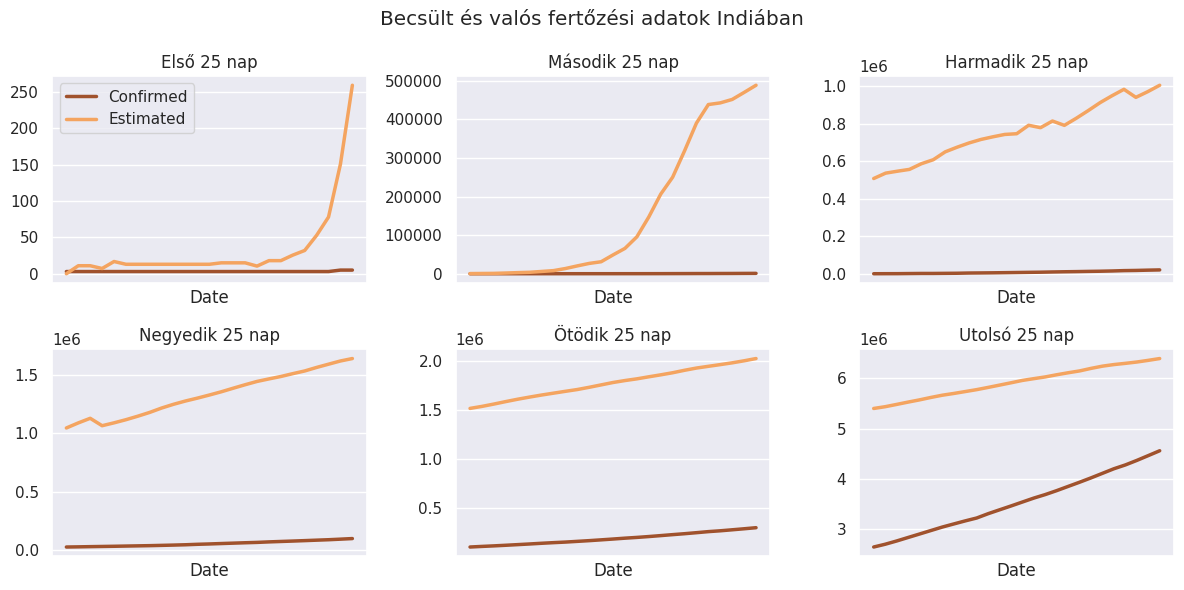

In [31]:
fig, axs = plt.subplots(2,3, figsize=(12,6))

sns.set_theme(style="darkgrid")

h1=sns.lineplot(data=table1['India infected'], linewidth=2.5, color='sienna', ax=axs[0,0], label='Confirmed')
sns.lineplot(data=table2['approximated'], linewidth=2.5, color='sandybrown', ax=axs[0,0], label='Estimated')
h1.set(xticks=[])
h1.set_ylabel(None)
axs[0,0].set_title('Első 25 nap')

h2=sns.lineplot(data=table3['India infected'], linewidth=2.5, color='sienna', ax=axs[0,1])
sns.lineplot(data=table4['approximated'], linewidth=2.5, color='sandybrown', ax=axs[0,1])
h2.set(xticks=[])
h2.set_ylabel(None)
axs[0,1].set_title('Második 25 nap')

h3=sns.lineplot(data=table5['India infected'], linewidth=2.5, color='sienna', ax=axs[0,2])
sns.lineplot(data=table6['approximated'], linewidth=2.5, color='sandybrown', ax=axs[0,2])
h3.set(xticks=[])
h3.set_ylabel(None)
axs[0,2].set_title('Harmadik 25 nap')

h4=sns.lineplot(data=table7['India infected'], linewidth=2.5, color='sienna', ax=axs[1,0])
sns.lineplot(data=table8['approximated'], linewidth=2.5, color='sandybrown', ax=axs[1,0])
h4.set(xticks=[])
h4.set_ylabel(None)
axs[1,0].set_title('Negyedik 25 nap')

h5=sns.lineplot(data=table9['India infected'], linewidth=2.5, color='sienna', ax=axs[1,1])
sns.lineplot(data=table10['approximated'], linewidth=2.5, color='sandybrown', ax=axs[1,1])
h5.set(xticks=[])
h5.set_ylabel(None)
axs[1,1].set_title('Ötödik 25 nap')

h6=sns.lineplot(data=table11['India infected'], linewidth=2.5, color='sienna', ax=axs[1,2])
sns.lineplot(data=table12['approximated'], linewidth=2.5, color='sandybrown', ax=axs[1,2])
h6.set(xticks=[])
h6.set_ylabel(None)
axs[1,2].set_title('Utolsó 25 nap')

axs[0,0].legend()
fig.suptitle('Becsült és valós fertőzési adatok Indiában')
plt.tight_layout()
plt.show()

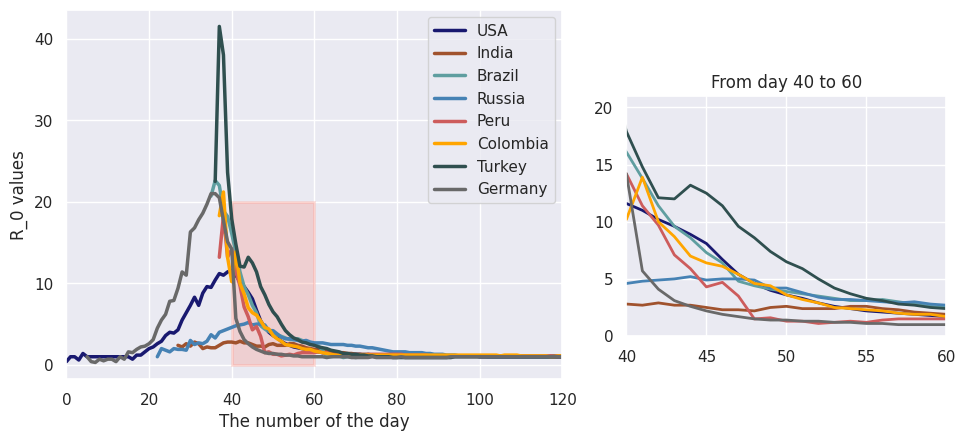

In [36]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()
sns.set_theme(style='darkgrid')

namelist=['USA', 'India', 'Brazil', 'Russia', 'Peru', 'Colombia', 'Turkey', 'Germany']
colorlist=['midnightblue', 'sienna', 'cadetblue', 'steelblue', 'indianred', 'orange',  'darkslategrey', 'dimgray']

for i in range(len(namelist)):
    sns.lineplot(data=R_0_vals[namelist[i]], linewidth=2.5, color=colorlist[i], label=namelist[i])

plt.legend(loc="upper right")
plt.xlabel('The number of the day')
plt.ylabel('R_0 values')
plt.xlim(0,120)

left, bottom, width, height = (40, 0, 20, 20)
rect=mpatches.Rectangle((left,bottom),width,height,
                        color="salmon", alpha=0.25,
                       linewidth=2)
plt.gca().add_patch(rect)

sns.set_theme(style='darkgrid')
ax2 = plt.axes([1, 0.2, 0.5, 0.5])
for i in range(len(namelist)):
    sns.lineplot(R_0_vals[namelist[i]], linewidth=2, ax=ax2, color=colorlist[i])
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_xlim([40,60])
ax2.set_ylim([0,21])
ax2.set_title('From day 40 to 60')

plt.show()